# Instrumental Variables

ECON526

Paul Schrimpf (University of British Columbia)

# Introduction

$$
\def\indep{\perp\!\!\!\perp} % \def\idp{\perp\kern-5pt\perp}
\def\Er{\mathrm{E}}
\def\var{\mathrm{Var}}
\def\cov{\mathrm{Cov}}
\def\R{\mathbb{R}}
\def\En{{\mathbb{E}_n}}
\def\Pr{\mathrm{P}}
\newcommand{\norm}[1]{\left\Vert {#1} \right\Vert}
\newcommand{\abs}[1]{\left\vert {#1} \right\vert}
\def\inprob{{\,{\buildrel p \over \rightarrow}\,}}
\def\indist{\,{\buildrel d \over \rightarrow}\,}
\DeclareMathOperator*{\plim}{plim}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
$$

## Endogeneity

$$
Y_i = X_i' \beta_0 + \epsilon_i
$$

-   Believe $\Er[X_i \epsilon_i] \neq 0$, so OLS biased and inconsistent

## Sources of Endogeneity

-   Omitted variables
-   Simultaneity
-   Measurement error
-   And more …

## Omitted Variables

-   Desired model $$
    Y_i = X_i'\beta_0 + W_i'\gamma_0 + \epsilon_i
    $$ Assume $\Er[\epsilon] = \Er[X\epsilon] = \Er[W\epsilon] = 0$

-   Estimated model $$
    Y_i = X_i'\beta + \underbrace{u_i}_{\equiv W_i'\gamma_0 + \epsilon_i}
    $$

## Omitted Variables Bias

-   OLS inconsistent and biased

$$
\plim \hat{\beta}^{OLS} \inprob \beta_0 + \Er[X_i X_i']^{-1} \Er[X_i W_i'] \gamma_0
$$

-   Or if $X_i = (1, x_i)'$ and $W_i$ is a scalar,
    $y_i = \beta_0 + \beta_1 x_i + \gamma_0 w_i + \epsilon$ $$
    \plim \hat{\beta}_1 \inprob \beta_1 + \frac{\cov(x_i,w_i)}{\var(x_i)} \gamma_0
    $$

## Simultaneity

-   Equilibrium conditions lead to variables that are simultaneously
    determined

-   Demand and supply: $$
    \begin{align*}
    Q_i^D & = P_i \beta_D + X_D'\gamma_D + u_{D,i} \\
    Q_i^S & = P_i \beta_S + X_S'\gamma_S + u_{S,i} \\
    Q_i^S & = Q_i^D
    \end{align*}
    $$

-   Assume $X_D$ and $X_S$ exogenous

    -   $0 = \Er[X_D u_{D,i}] = \Er[X_D u_{S,i}] = \Er[X_S u_{D,i}] = \Er[X_S u_{S,i}]$

## Simultaneity

-   Structural equations: (demand and inverse supply): $$
    \begin{align*}
    Q_i & = P_i \beta_D + X_D'\gamma_D + u_{D,i} \\
    P_i & = Q_i \frac{1}{\beta_S}  - X_S'\gamma_D\frac{1}{\beta_S} - u_{S,i}\frac{1}{\beta_S} \\
    \end{align*}
    $$
-   Reduced form: $$
    \begin{align*}
    Q_i = & \frac{\beta_D}{\beta_D - \beta_S} \left( -X_{D,i}' \gamma_D + X_{S,i}'\gamma_S - u_{D,i} + u_{S,i} \right) + X_{D,i}'\gamma_D + u_{D,i} \\
    P_i = & \frac{1}{\beta_D - \beta_S}\left(-X_{D,i}' \gamma_D + X_{S,i}'\gamma_S - u_{D,i} + u_{S,i} \right)
    \end{align*}
    $$
-   $\Er[P_i u_{D,i}] \neq 0$, so OLS estimate of
    $Q_i = P_i \beta_D + X_D'\gamma_D + u_{D,i}$ is biased and
    inconsistent

## Measurment Error

-   True model $$
    Y_i = \beta_0 + \beta_1 x_i^* + \epsilon_i
    $$ with $\Er[x_i^* \epsilon_i]=0$, but $x_i^*$ unobserved
-   Observe $x_i = x_i^* + u_i$
-   Estimated model $$
    Y_i = \beta_0 + \beta_1 x_i + \underbrace{\tilde{\epsilon}_i}_{\equiv -\beta_1 u_i + \epsilon_i}
    $$
-   $\Er[x_i\tilde{\epsilon}_i] = -\beta_1\Er[u_i^2] \neq 0$

# Instrumental Variables

## Instrumental Variables

$$
Y_i = \underbrace{X_i}_{\in \R^k}' \beta_0 + \epsilon_i
$$

-   $\Er[\epsilon_i] = 0$, but $\Er[X_i \epsilon_i] \neq 0$

-   Instrument $Z_i \in \R^d$ s.t.

    1.  Relevant $rank(\Er[Z_i X_i']) = k$

    2.  Exogenous $\Er[Z_i \epsilon_i] = 0$

``` python
import graphviz as gr

dot = gr.Digraph()
dot.edge('X', 'Y', style = 'dashed')
dot.edge('ϵ','Y')
dot.edge('ϵ','X')
dot.edge('Z','X')
dot
```



## Instrumental Variables Estimator

-   Assumed $0 = \Er[Z_i \epsilon_i] = \Er[Z_i(y_i - X_i'\beta_0)]$
-   Estimate by solving $$
    0 \approx \frac{1}{n} \sum_{i=1}^n Z_i(y_i - X_i'\hat{\beta}^{2SLS})
    $$
-   $\hat{\beta}^{2SLS}  = (X'Z (Z'Z)^{-1} Z' X)^{-1} (X'Z(Z'Z)^{-1}Z'y)$

## Two Stage Least Squares

$$
\begin{align*}
\hat{\beta}^{2SLS} & = (X'Z (Z'Z)^{-1} Z' X)^{-1} (X'Z(Z'Z)^{-1}Z'y) \\
& = (X'P_Z X)^{-1} (X' P_Z y) \\
& = ((P_Z X)'(P_Z X))^{-1} ((P_Z X)'y)
\end{align*}
$$

1.  Regress $X$ on $Z$, let $\hat{X} = P_Z X$
2.  Regress $y$ on $\hat{X}$

## IV Best Practices

-   Report the first stage regression of $X$ on $Z$
    -   Check for relevance
-   Report the reduced form regression of $Y$ on $Z$
-   If relevance at all in doubt, use weak identification robust
    confidence intervals
    -   E.g. `ivmodels.summary` with `test='lagrange multiplier'`

# Example: Returns to Education

## Example: Returns to Education

-   From Angrist and Krueger (1991)

In [3]:
import graphviz as gr

g = gr.Digraph()
g.edge('Education', 'Earnings', style = 'dashed')
g.edge('Ability', 'Education')
g.edge('Ability', 'Earnings')
g.edge('?', 'Education')
g

## Example: Returns to Education

``` python
g = gr.Digraph()
g.edge('Education', 'Earnings', style = 'dashed')
g.edge('Ability', 'Education')
g.edge('Ability', 'Earnings')
g.edge('Quarter of Birth', 'Education')
g
```



``` python
import pandas as pd

df = pd.read_csv('data/ak91.csv')
df.head()
```

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>

|     | log_wage | years_of_schooling | year_of_birth | quarter_of_birth | state_of_birth |
|-----|----------|--------------------|---------------|------------------|----------------|
| 0   | 5.790019 | 12.0               | 30.0          | 1.0              | 45.0           |
| 1   | 5.952494 | 11.0               | 30.0          | 1.0              | 45.0           |
| 2   | 5.315949 | 12.0               | 30.0          | 1.0              | 45.0           |
| 3   | 5.595926 | 12.0               | 30.0          | 1.0              | 45.0           |
| 4   | 6.068915 | 12.0               | 30.0          | 1.0              | 37.0           |

</div>

## Example: Returns to Education

-   We must assume that
    1.  Relevance: $\cov(QOB, Education) \neq 0$
    2.  Exogeneity: $Earnings \perp QOB \mid Education$

## Example: Relevance

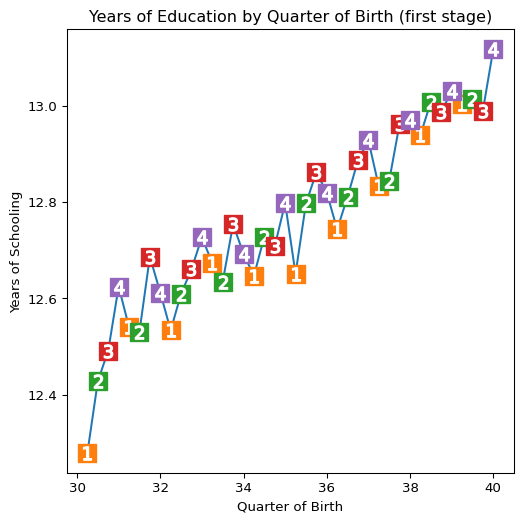

In [6]:
import matplotlib.pyplot as plt
group_data = (df
    .groupby(["year_of_birth", "quarter_of_birth"])
    [["log_wage", "years_of_schooling"]]
    .mean()
    .reset_index()
    .assign(time_of_birth = lambda d: d["year_of_birth"] + (d["quarter_of_birth"])/4))

plt.figure(figsize=(6,6))
plt.plot(group_data["time_of_birth"], group_data["years_of_schooling"], zorder=-1)
for q in range(1, 5):
    x = group_data.query(f"quarter_of_birth=={q}")["time_of_birth"]
    y = group_data.query(f"quarter_of_birth=={q}")["years_of_schooling"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Years of Education by Quarter of Birth (first stage)")
plt.xlabel("Quarter of Birth")
plt.ylabel("Years of Schooling");

## Example: Relevance

In [7]:
# Convert the quarter of birth to dummy variables
factor_data = df.assign(**{f"q{int(q)}": (df["quarter_of_birth"] == q).astype(int)
                             for q in df["quarter_of_birth"].unique()})

# Run the first stage regression
import statsmodels.formula.api as smf

first_stage = smf.ols("years_of_schooling ~ C(year_of_birth) + C(state_of_birth) + q4", data=factor_data).fit()

print("q4 parameter estimate:, ", first_stage.params["q4"])
print("q4 p-value:, ", first_stage.pvalues["q4"])

q4 parameter estimate:,  0.10085809272786722
q4 p-value:,  5.4648294166122615e-15

## Example: Exogeneity

-   No way to test the exogeneity assumption
    -   Seems okay here
    -   Hard to come up with other reason why quarter of birth would
        affect earnings

## Example: Reduced Form

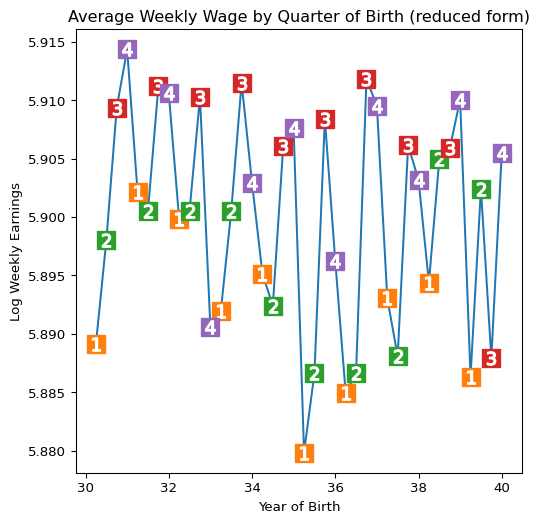

In [8]:
# Plot the reduced form
plt.figure(figsize=(6,6))
plt.plot(group_data["time_of_birth"], group_data["log_wage"], zorder=-1)
for q in range(1, 5):
    x = group_data.query(f"quarter_of_birth=={q}")["time_of_birth"]
    y = group_data.query(f"quarter_of_birth=={q}")["log_wage"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Average Weekly Wage by Quarter of Birth (reduced form)")
plt.xlabel("Year of Birth")
plt.ylabel("Log Weekly Earnings");

## Example: Reduced Form

In [9]:
# Run the reduced form
reduced_form = smf.ols("log_wage ~ C(year_of_birth) + C(state_of_birth) + q4", data=factor_data).fit()

print("q4 parameter estimate:, ", reduced_form.params["q4"])
print("q4 p-value:, ", reduced_form.pvalues["q4"])

q4 parameter estimate:,  0.008603484260139821
q4 p-value:,  0.001494912718366322

## Example: 2SLS

In [10]:
ate_iv = reduced_form.params["q4"] / first_stage.params["q4"]
print("ATE (IV):", ate_iv)

ATE (IV): 0.08530286492085

## Example: Returns to Education

-   Use a package for IV
    -   `ivmodels` (best support for weak instrument robust inference)
    -   `pyfixest.feols`
    -   `statsmodels.sandbox.regression.gmm.IV2SLS`
    -   `linearmodels.iv.IV2SLS`

## Example: `linearmodels`

In [11]:
from linearmodels.iv import IV2SLS

formula = 'log_wage ~ 1 + C(year_of_birth) + C(state_of_birth) + [years_of_schooling ~ q4]'
iv = IV2SLS.from_formula(formula, data=factor_data).fit()
print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               log_wage   R-squared:                      0.1217
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1215
No. Observations:              329509   F-statistic:                 1.028e+04
Date:                Mon, Nov 25 2024   P-value (F-stat)                0.0000
Time:                        10:45:22   Distribution:                 chi2(60)
Cov. Estimator:                robust                                         
                                                                              
                                     Parameter Estimates                                     
                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------
Intercept                     4.7468     0.2904     16.348     0.0000      4.1777     

## Example: `pyfixest`

In [12]:
import pyfixest as pf
ivpf = pf.feols('log_wage ~ 1 | state_of_birth + year_of_birth | years_of_schooling ~ q4', data=factor_data, vcov="HC1")
pf.etable(ivpf, type='md')

index                    est1
------------------  ---------
depvar               log_wage
-----------------------------
years_of_schooling  0.085***
                      (0.026)
-----------------------------
year_of_birth               x
state_of_birth              x
-----------------------------
Observations           329509
S.E. type              hetero
R2                          -
-----------------------------


## Example: `ivmodels`

In [13]:
from patsy import dmatrices
import ivmodels
y,X = dmatrices("log_wage ~ 0 + years_of_schooling", data=factor_data, return_type='dataframe')
Z,controls = dmatrices("q4 ~  C(year_of_birth) + C(state_of_birth)", data=factor_data, return_type='dataframe')
controls.drop("Intercept", axis=1,inplace=True)

ivm = ivmodels.KClass(1).fit(X=X,y=y,Z=Z,C=controls)
sw = ivm.summary(X=X,y=y,Z=Z,C=controls, test='wald', feature_names=["years_of_schooling"])
print(sw)

Summary based on the wald test.

                    estimate  statistic    p-value          conf. set
years_of_schooling    0.0853      11.15  0.0008402  [0.03523, 0.1354]

Endogenous model statistic: 11.15, p-value: 0.0008402
(Multivariate) F-statistic: 61.09, p-value: 5.44e-15

# Weak Instruments

## Weak Instruments

-   One endogenous regressor, one instrument
    -   Structural equation $$
        y_i = \beta_0 + \beta_1 x_i + \epsilon_i
        $$
    -   First stage $$
        x_i = \pi_0^x + \pi_1^x z_i + u_i^x
        $$
    -   Reduced Form $$
        y_i = \pi_0^y + \pi_1^y z_i + u_i^y
        $$
-   $\text{2SLS} = \frac{\text{Reduced Form}}{\text{First Stage}}$
-   $\hat{\beta}^{2SLS}_1 = \frac{\hat{\pi}_1^y}{\hat{\pi}_1^x}$

## Weak Instruments

-   $\hat{\beta}^{2SLS}_1 = \frac{\hat{\pi}_1^y}{\hat{\pi}_1^x}$
-   If $z$ not relevant, then divide by $0$
-   Even if $z$ relevant, if $\hat{\pi}_1^x$ is too likely near 0, then
    $\hat{\beta}^{2SLS}_1$ will be messed up
    -   usual asymptotic normal distribution becomes a poor
        approximation to true finite sample distribution of
        $\hat{\beta}^{2SLS}_1$
-   “too likely near 0” is more common than one might think

## Weak Instrument Simulation

-   First stage $X = Z\gamma + e$, simulation with $\Er[Z_i Z_i] = I$
    and $e \sim N(0,0.25)$, so first stage
    $t \approx \sqrt{n}\gamma/0.5$

-   Distribution of $\hat{\beta}^{2SLS}$ with $\gamma = 1$,
    $\gamma=0.5$, $\gamma=0.2$, and $\gamma=0.1$ and $n=100$

    -   implies first stage t-statistics of $20$, $10$, $4$, and $2$

## Weak Instrument Simulation : $\hat{\beta}^{2SLS}$

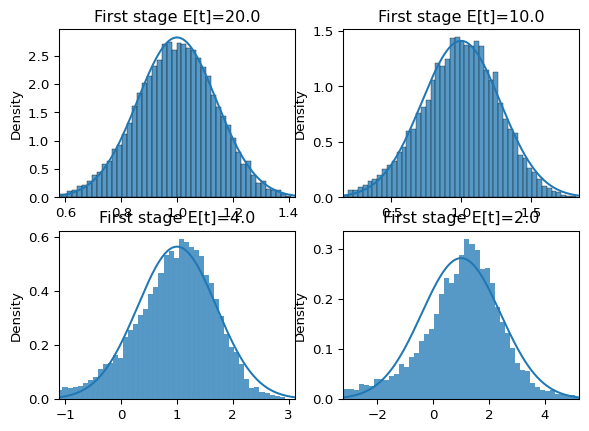

In [14]:
import seaborn as sns
import numpy as np
import scipy
n = 100
gamma = [1,0.5, 0.2,0.1]
sig = 0.5
Exe=1.0

def simiv(n,gamma,sig, b0, Exe):
   z = np.random.randn(n)
   xe = np.random.randn(n)
   x = z*gamma + (xe*Exe + np.random.randn(n))/np.sqrt(1+Exe**2)*sig
   e = xe + np.random.randn(n)
   y = x*b0 + e
   return(y,x,z)

def b2sls(y,x,z) :
    return(np.dot(z,y)/np.dot(z,x))

S = 10_000
fig, ax = plt.subplots(2,2)
x = np.linspace(-3,3,num=300)
b0 = 1

for j in range(len(gamma)):
    se = np.sqrt(2/n)/(gamma[j])
    phix = scipy.stats.norm(loc=b0,scale=se).pdf(x*se + b0)
    b = np.array([(lambda x: b2sls(x[0],x[1],x[2]))(simiv(n,gamma[j],sig,b0,Exe)) for _ in range(S)])
    sns.histplot(b, ax=ax.flat[j], stat='density')
    ax.flat[j].set_title(f"First stage E[t]={np.sqrt(n)*gamma[j]/sig:.3}")
    ax.flat[j].plot(x*se+b0,phix)
    ax.flat[j].set_xlim(-3*se +1,3*se+1)

## Weak Instrument Simulation : t-stat

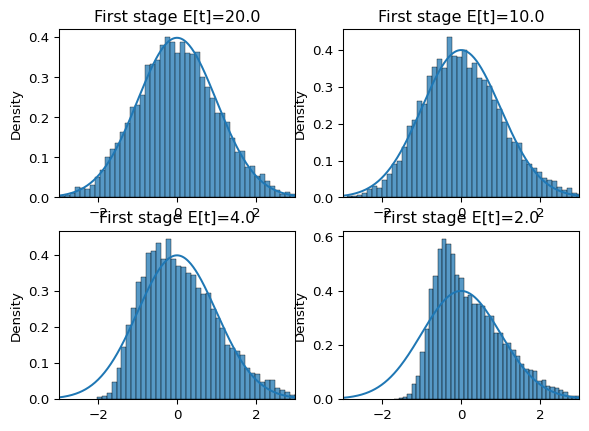

In [15]:
def t2sls(y,x,z, b0=1) :
    b = b2sls(y,x,z)
    u = y - x*b
    se = np.sqrt(u.var()*np.dot(z,z)/(np.dot(x,z)**2))
    t = (b-b0)/se
    return(t)

S = 10_000
fig, ax = plt.subplots(2,2)
x = np.linspace(-3,3,num=300)
phix = scipy.stats.norm.pdf(x)
for j in range(len(gamma)):
    ts = np.array([(lambda x: t2sls(x[0],x[1],x[2],b0=b0))(simiv(n,gamma[j],sig,b0,Exe)) for _ in range(S)])
    sns.histplot(ts, ax=ax.flat[j], stat='density')
    ax.flat[j].set_title(f"First stage E[t]={np.sqrt(n)*gamma[j]/sig:.3}")
    ax.flat[j].plot(x,phix)
    ax.flat[j].set_xlim(-3,3)

## Weak Instruments

-   Lessons from simulation:
    -   When $\Er[Z_i X_i']$ is small, usual asymptotic distribution is
        a poor approximation for the finite sample distribution of
        $\hat{\beta}^{IV}$
    -   The approximation can be poor even when $H_0: \gamma = 0$ in
        $X = Z\gamma + e$ would be rejected

## First stage F-statistic

-   Always report first stage “effective” F-statistic

In [16]:
y,x,z = simiv(n,gamma[3],sig, b0, Exe)
model=pf.feols('y ~ 1 | 0 | x ~ z', pd.DataFrame({'y':y,'x':x, 'z': z}))
model.IV_Diag()
model._eff_F

np.float64(1.590117698552708)

-   If $F >> 100$, everything okay
    -   (old advice of $F>10$ is not enough)
    -   Even larger needed if more instruments
-   Else, use different method for confidence intervals and testing

## Identification Robust Inference

-   Can we find a better approximation to the finite sample distribution
    when $\Er[Z_i X_i']$ is small?

-   Yes, two approaches lead to the same answers:

    1.  Require uniform (over values of $\Er[Z_iX_i']$) converge
    2.  Weak instrument asymptotics (instead of $\Er[Z_i X_i]$ fixed
        with $n$, suppose $\Er[Z_i X_i'] = C/\sqrt{n}$)

-   Identification robust tests:

    -   Anderson Rubin (okay when just identified — number of
        instruments = number of endogenous regressors)
    -   Conditional likelihood ratio
    -   Lagrange multiplier

## Identification Robust Inference

-   `ivmodels` from Londschien and Bühlmann (2024) seems like best
    python package
    -   convenient confidence intervals
    -   downside: assumes homoscedasticity

In [17]:
y,X = dmatrices("log_wage ~ 0 + years_of_schooling", data=factor_data, return_type='dataframe')
Z,controls = dmatrices("q4 ~  C(year_of_birth) + C(state_of_birth)", data=factor_data, return_type='dataframe')
controls.drop("Intercept", axis=1,inplace=True)
ivm = ivmodels.KClass(1).fit(X=X,y=y,Z=Z,C=controls)
sa = ivm.summary(X=X,y=y,Z=Z,C=controls, test='anderson-rubin', feature_names=["years_of_schooling"])
print(sa)

Summary based on the anderson-rubin test.

                    estimate  statistic   p-value          conf. set
years_of_schooling    0.0853      10.09  0.001495  [0.03477, 0.1382]

Endogenous model statistic: 10.09, p-value: 0.001495
(Multivariate) F-statistic: 61.09, p-value: 5.44e-15

## Identification Robust Inference

In [18]:
sl = ivm.summary(X=X,y=y,Z=Z,C=controls, test='lagrange multiplier', feature_names=["years_of_schooling"])
print(sl)

Summary based on the lagrange multiplier test.

                    estimate  statistic   p-value          conf. set
years_of_schooling    0.0853      10.09  0.001495  [0.03477, 0.1382]

Endogenous model statistic: 10.09, p-value: 0.001495
(Multivariate) F-statistic: 61.09, p-value: 5.44e-15

## Sources and Further Reading

-   [Chapter 8 and
    9](https://matheusfacure.github.io/python-causality-handbook/08-Instrumental-Variables.html)
    of Facure (2022)

-   Chapters 6, 12, and 13 of Chernozhukov et al. (2024)

-   [The Effect: Chapter 19 - Instrumental
    Variables](https://www.theeffectbook.net/ch-InstrumentalVariables.html)
    Huntington-Klein (2021)

## References

Angrist, Joshua D., and Alan B. Krueger. 1991. “Does Compulsory School
Attendance Affect Schooling and Earnings?” *The Quarterly Journal of
Economics* 106 (4): pp. 979–1014. <http://www.jstor.org/stable/2937954>.

Chernozhukov, V., C. Hansen, N. Kallus, M. Spindler, and V. Syrgkanis.
2024. *Applied Causal Inference Powered by ML and AI*.
<https://causalml-book.org/>.

Facure, Matheus. 2022. *Causal Inference for the Brave and True*.
<https://matheusfacure.github.io/python-causality-handbook/landing-page.html>.

Huntington-Klein, Nick. 2021. *The Effect: An Introduction to Research
Design and Causality*. CRC Press. <https://theeffectbook.net/>.

Londschien, Malte, and Peter Bühlmann. 2024. “Weak-Instrument-Robust
Subvector Inference in Instrumental Variables Regression: A Subvector
Lagrange Multiplier Test and Properties of Subvector Anderson-Rubin
Confidence Sets.” <https://arxiv.org/abs/2407.15256>.